#Lab Assignment - 2
**2023-CS543 Reinforcement Learning Lab.** \\
Instructor : Shashi Shekhar Jha (shashi@iitrpr.ac.in)

**Due on 03-03-2023    2400 Hrs   (100 Marks)**

**Submission Instructions**:
All submissions are through google classroom, upload a single colab notebook with .ipynb extension. Go to file->Download-> Download .ipynb in colab to download the file. 

In case you face any trouble with the submission, please contact the TA:

Shivam Kainth, 2020csz0006@iitrpr.ac.in



Your submission must be your original work. Do not indulge in any kind of plagiarism or copying. Abide by the honour and integrity code to do your assignment.

Late submissions will attract penalties.

**Penalty Policy**: There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. For the 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.


**Naming Instructions**:
Name the colab file submission as follows: \<YourName>_\<rollnumber>_Lab2.ipynb 

E.g. if your name is ABC, roll number is 2022csx1234 and submission is for lab2 then you should name the colab file as: ABC_2022csx1234_lab2.ipynb


**This assignment will focus on the implementation of TD learning methods viz. the Q-learning and SARSA Algorithms on selected OpenAI Gym environments.**

**Template code is provided for reference/help and is optional to use**

## CliffWalking Environment


```
 	

gym.make("CliffWalking-v0")
```



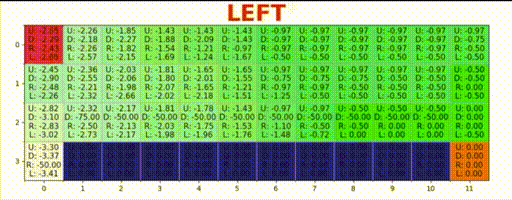

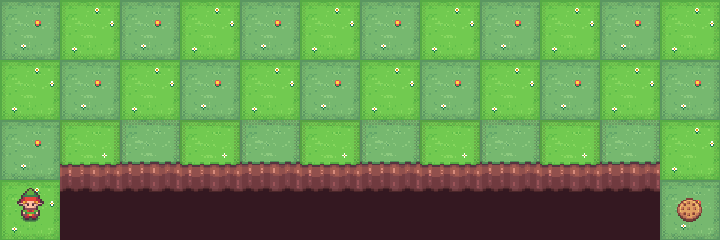

**Description**:


The board is a 4x12 matrix, with (using NumPy matrix indexing):

    [3, 0] as the start at bottom-left

    [3, 11] as the goal at bottom-right

    [3, 1..10] as the cliff at bottom-center

If the agent steps on the cliff, it returns to the start. An episode terminates when the agent reaches the goal.

**Actions**

There are 4 discrete deterministic actions:

    0: move up

    1: move right

    2: move down

    3: move left

**Observations**

There are 3x12 + 1 possible states. In fact, the agent cannot be at the cliff, nor at the goal (as this results in the end of the episode). It remains all the positions of the first 3 rows plus the bottom-left cell. The observation is simply the current position encoded as flattened index.

**Reward**

Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward.
    
    

In [ ]:
!pip install gymnasium
!pip install gymnasium[toy_text]
!pip install gymnasium[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 14.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 81.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 KB 35.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py

In [ ]:
!pip3 install imageio==2.4.1

!pip install --upgrade imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 34.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303886 sha256=c729b8659f33baa49555b5ecf34498cf2dde554dc0837ae637a34a248dfc0228
  Stored in directory: /root/.cache/pip/wheels/be/7b/04/4d8d56f1d503e5c404f0de6018c0cfa592c71588a39b49e002
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 54.3 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym

In [ ]:

import pygame
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time 
import os, sys
os.environ["SDL_VIDEODRIVER"] = "dummy"
pygame.init()
screen = pygame.display.set_mode((800,400))

In [ ]:
def render():
        color = (255, 100, 0)
        pygame.display.flip()
        view = pygame.surfarray.array3d(screen)
        view = view.transpose([1, 0, 2])
        img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
        return img_bgr


In [ ]:
env = gym.make('CliffWalking-v0',render_mode="none")
env.reset()


/usr/local/lib/python3.8/dist-packages/gymnasium/envs/registration.py:628: UserWarning: WARN: The environment is being initialised with render_mode='none' that is not in the possible render_modes (['human', 'rgb_array', 'ansi']).
  logger.warn(


(36, {'prob': 1})

In [ ]:
print(env.step(1))


(36, -100, False, False, {'prob': 1.0})


Taking 10 random steps in cliffwalking 

In [ ]:
for i in range(10):
  next_state, reward, done,_,__= env.step(np.random.randint(0,4))
  render()

#  Lunar Lander environment from OpenAI Gym. 
https://www.gymlibrary.dev/environments/box2d/lunar_lander/

**Description**

This environment is a classic rocket trajectory optimization problem. According to Pontryagin’s maximum principle, it is optimal to fire the engine at full throttle or turn it off. This is the reason why this environment has discrete actions: engine on or off.

There are two environment versions: discrete or continuous. In the assignment we will be dealing with **Discrete** task. The landing pad is always at coordinates (0,0). The coordinates are the first two numbers in the state vector. Landing outside of the landing pad is possible. Fuel is infinite, so an agent can learn to fly and then land on its first attempt.


**Action Space**

There are four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine.

**Observation Space**

The state is an 8-dimensional vector: the coordinates of the lander in x & y, its linear velocities in x & y, its angle, its angular velocity, and two booleans that represent whether each leg is in contact with the ground or not.

**Rewards**

Reward for moving from the top of the screen to the landing pad and coming to rest is about 100-140 points. If the lander moves away from the landing pad, it loses reward. If the lander crashes, it receives an additional -100 points. If it comes to rest, it receives an additional +100 points. Each leg with ground contact is +10 points. Firing the main engine is -0.3 points each frame. Firing the side engine is -0.03 points each frame. Solved is 200 points.

**Starting State**

The lander starts at the top center of the viewport with a random initial force applied to its center of mass.

**Episode Termination**

The episode finishes if:

    the lander crashes (the lander body gets in contact with the moon);

    the lander gets outside of the viewport (x coordinate is greater than 1);

    the lander is not awake. From the Box2D docs, a body which is not awake is a body which doesn’t move and doesn’t collide with any other body:


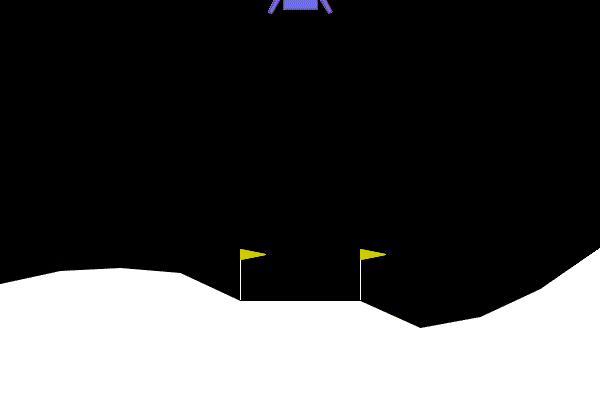

# Template code for running Lunar lander

In [ ]:
import gym
env = gym.make("LunarLander-v2",render_mode="human")
env.reset()
print(env.observation_space.shape[0])

8


In [ ]:
env.reset()
render()

In [ ]:
env.action_space

Discrete(4)

Taking random actions, we have to supply 4 actions to the agent. They have to be clipped between -1.0  to  1.0

In [ ]:
for i in range(100):
  next_state, reward, done,_= env.step(np.random.randint(0,4))
  render()

# Questions [Total 100 points]


## ***On Cliff-Walking*** 

Q1. Implement a Q-learning agent using a purely random behavior policy for the following learning rates $\alpha$ = [0.0005,0.005,0.01,0.07,0.1].  In each case, report the effect of $\alpha$ on Q-learning and demonstrate using plots. Plot the learning curve of the policies learnt in each case using  episode vs. avg reward/episode  **(20 points)**
 
Q2. Implement Q-Learning using the $\epsilon$-Greedy behaviour policy with  $\alpha$ = 0.0001 and $\epsilon$ = [0.95, 0.76, 0.55, 0.25, 0.1]. What is the effect of $\epsilon$ on the performance of Q-Learning?  Support your arguments with valuable statistics and graphs. You should create a graph of Epsilon with Average Q-values for start State(3,0) ,state(0,4) , state (1,7) and state(2,9). See the image included below. **(20 points)** 

Q3. What is the relationship/similarities between Purely Random policy and $ϵ$- greedy policy? Comment on the performance difference among these policies. Is Random Policy a special case of  $ϵ$-Greedy policy?  **(5 point)**

Q4.  Implement Q-Learning using the $\epsilon-$Greedy behaviour policy where $\epsilon$ is reduced from 1 to 0.01 with increasing number of episodes. Plot the learning curve of the policy being learnt using episode vs. avg reward/episode. **(10 points)**

***Note In all the above questions, render the cliff walking with the final learnt policy ***


States whose values to be plotted for Q2 

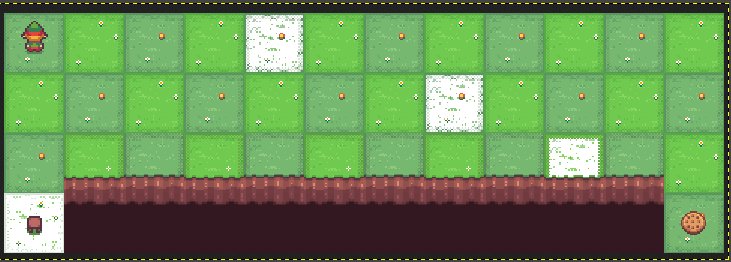

In [ ]:

import gymnasium as gym
import pygame
import numpy as np
import random
env = gym.make('CliffWalking-v0',render_mode="none") #we do render_mode = none so that the code runs faster
env.reset()
transitions = env.P



(24, -1, False, False, {'prob': 1.0})


/usr/local/lib/python3.8/dist-packages/gymnasium/envs/registration.py:628: UserWarning: WARN: The environment is being initialised with render_mode='none' that is not in the possible render_modes (['human', 'rgb_array', 'ansi']).
  logger.warn(


# video for cliff walking

In [ ]:
#this function stores the images generated by render() in a array
def img_to_vid(q,path):
  env = gym.make('CliffWalking-v0',render_mode="human")
  state = env.reset()[0]


  iter = 0
  img = []
  while True:
    iter+=1
    A = np.argmax(q[state])
    nxt_state,r,temp,info,extra = env.step(A)
    print(state,A)
    img.append(render())
    
    state = nxt_state
    if(temp == True or iter>=100):
      break
  (img_to_video(img,path,4))

In [ ]:
#this function convert the set of images into video
#i wrote this using this website: https://www.life2coding.com/convert-image-frames-video-file-using-opencv-python/
def img_to_video(img_arr,path,fps):
  h,w,layers = img_arr[0].shape
  size = (w,h)
  out = cv2.VideoWriter(path,cv2.VideoWriter_fourcc(*'DIVX'),fps,size)
  for i in range(len(img_arr)):
    out.write(img_arr[i])
  out.release

In [ ]:
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML
#this function helps us to display video
#i wrote this using this link: https://github.com/TUIlmenauAMS/Videocoding/blob/main/seminars/vc_seminar01_support.ipynb

def display_video(video):
    fig = plt.figure(figsize=(9,6))  #Display size specification

    mov = []
    for i in range(len(video)):  #Append videos one by one to mov
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    #Animation creation
    anime = animation.ArtistAnimation(fig, mov, interval=200, repeat_delay=1000)

    plt.close()
    return anime

In [ ]:
import random
#the epsilon greedy policy. choose greedy action with 1-e probablity and random action by e probablity
def egreedy(transitions,cur_state,epsilon,q):
  ac = 0
  if(random.random()<= epsilon):
    ac = random.randint(0,3)
  else:
    ac = np.argmax(q)
  return ac

# Q1



In [ ]:
import matplotlib.pyplot as plt
import time
env = gym.make('CliffWalking-v0',render_mode="none")
env.reset()
m = env.observation_space.n
n = env.action_space.n
# code of q learning wrote using the psuedo code in module 4
def qlearning(env,alpha,gamma,episode):
  q = np.zeros((m,n))
  rew = []
  ep = 0
  eps = []
  temp = 0
  while(ep<episode):
    env.reset()
    ep+=1
    cur_state = env.reset()[0]
    reward = 0
    iter = 0
    while iter<=500:
      iter+=1
      action = random.randint(0,3) #q learning with random policy
      
      new_state,r,temp,info,extra = env.step(action)
      reward+=r
      maxx = 0

      maxx = np.argmax(q[new_state])
      q[cur_state][action] = q[cur_state][action] + alpha*(r + gamma*maxx - q[cur_state][action])
      cur_state = new_state
      if(temp == True):
        print(ep)
        break
    eps.append(ep)
    rew.append(reward)
  return q,rew,eps



12
47
145
206
217
250
256
302
304
306
307
325
342
351
362
365
376
388
390
394
428
451
456
469
512
523
528
544
549
553
589
593
607
674
733
748
795
804
812
818
820
834
835
848
854
864
873
905
907
911
946
957
991
44
74
80
98
116
121
129
169
180
188
200
216
220
240
251
252
265
267
268
269
283
298
324
348
349
350
355
361
363
372
374
377
378
379
385
418
419
438
468
474
481
523
532
559
605
648
674
741
748
765
766
768
808
813
825
838
841
855
925
930
938
972
981
994
4
13
32
36
52
57
58
72
77
127
147
150
155
167
176
178
199
203
211
230
233
240
243
248
263
273
283
285
306
314
315
328
335
382
418
430
493
499
506
531
532
599
613
617
663
675
724
754
768
770
782
791
835
836
839
840
873
880
907
932
945
950
953
956
980
997
2
4
14
31
46
57
67
70
73
112
127
128
157
180
181
186
195
224
228
237
247
275
277
279
290
291
301
307
314
324
340
345
368
373
381
396
402
413
429
442
445
453
456
460
495
503
509
520
541
543
545
556
576
581
589
603
613
622
624
648
653
654
658
672
699
700
722
740
756
757
760
772
775
813

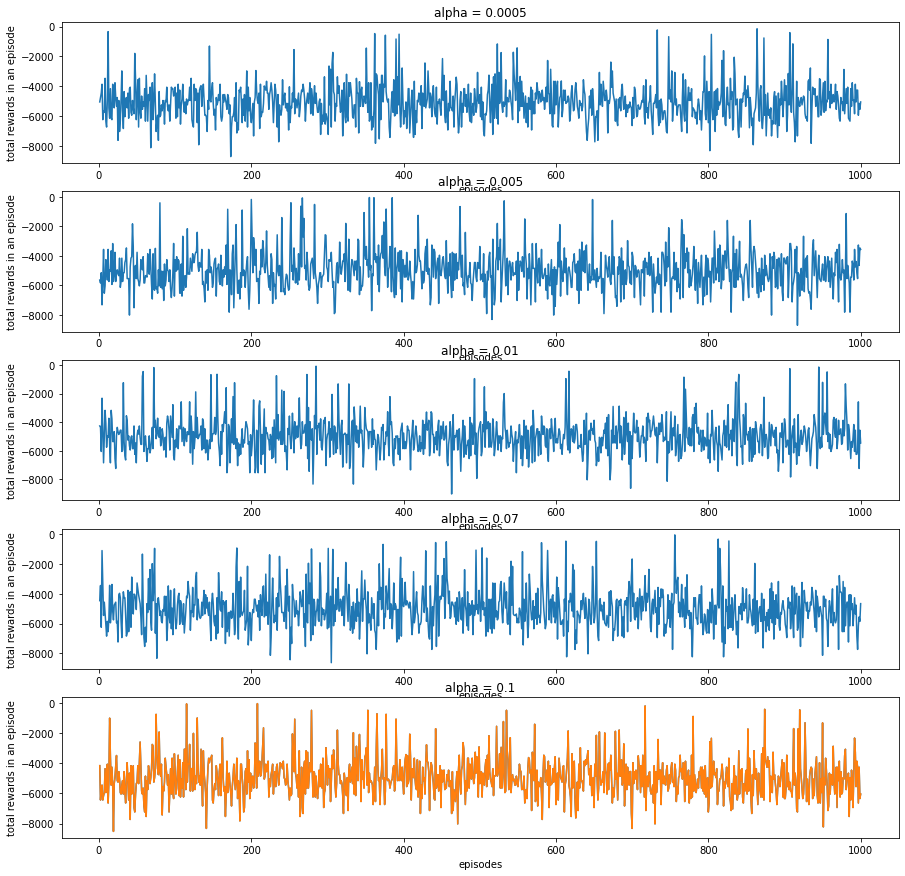

In [ ]:
ep  = [1000]
al = [0.0005,0.005,0.01,0.07,0.1]
i = 0
plt.figure(figsize = (15,15))
Qsa_random = []

for alpha in al:
  i+=1
  q,rew,eps = qlearning(env,alpha,0.99,1000)
  Qsa_random.append(q)
  plt.subplot(5,1,i)
  plt.plot(eps,rew)
  plt.title(f'alpha = {alpha}')
  plt.xlabel('episodes')
  plt.ylabel('total rewards in an episode')
plt.plot(eps,rew)


As we can see the random policy is no good even with increasing number of episodes and decreasing value of epsilon the rewards still fluctuates meaning the agent is not learning properly

In [ ]:
rewards_random = []
print(Qsa_random)
for i in Qsa_random:
  iter = 0 
  cur_state = env.reset()[0]
  sum_r = 0
  while(True):
    iter+=1
    action = np.argmax(i[cur_state])
    new_state,r,temp,info,extra = env.step(action)
    sum_r+=r
    cur_state = new_state
    if(temp == True or iter>=100):
      break
  rewards_random.append(sum_r)
print(rewards_random)

[array([[ 9.61358964e-01,  9.60761907e-01,  1.92709602e+00,
         9.61617390e-01],
       [ 9.35725188e-01,  9.45488083e-01,  1.86229761e+00,
         9.39666996e-01],
       [ 8.88061491e-01,  8.79220495e-01,  1.62397901e+00,
         8.74145088e-01],
       [ 7.63593104e-01,  7.26312062e-01,  1.40590942e+00,
         7.74322328e-01],
       [ 5.92276580e-01,  6.23639737e-01,  1.01841216e+00,
         6.21837510e-01],
       [ 4.72418549e-01,  4.02104829e-01,  7.63146049e-01,
         4.23611516e-01],
       [ 2.90353455e-01,  3.16423068e-01,  4.18043332e-01,
         3.12807197e-01],
       [ 2.09581787e-01,  2.71506412e-01,  3.77791003e-01,
         2.02826761e-01],
       [ 1.35856522e-01,  1.43122205e-01,  1.27234749e-01,
         1.40882789e-01],
       [ 1.06102116e-01,  7.20951216e-02,  1.52892701e-01,
         1.03022633e-01],
       [ 5.11688084e-02,  9.25604362e-02,  9.73537435e-02,
         7.30326433e-02],
       [ 6.70725396e-02,  7.20036788e-02,  8.27281967e-02,
     

Text(0, 0.5, 'rewards')

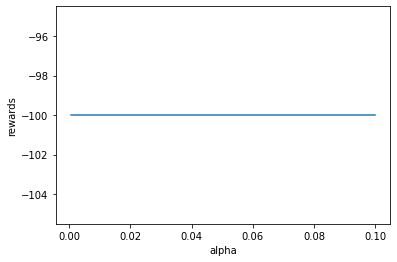

In [ ]:
plt.plot(al,rewards_random)
plt.xlabel('alpha')
plt.ylabel('rewards')

This graph shows that total reward the for the final policy is same for all the alpha.

# Render for alpha = 0.0005

In [ ]:
path = './cwq2.mp4'

img_to_vid(Qsa_random[0],path)

video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5


36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2


# Render for alpha = 0.005

In [ ]:
path = './cwq2.mp4'

img_to_vid(Qsa_random[1],path)

video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5


36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2


# Render for alpha = 0.01

In [ ]:
path = './cwq2.mp4'

img_to_vid(Qsa_random[2],path)

video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5


36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2
36 2


# Render for alpha = 0.07

In [ ]:
path = './cwq2.mp4'

img_to_vid(Qsa_random[3],path)

video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5


36 0
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3


# Render for alpha = 0.1

In [ ]:
path = './cwq2.mp4'

img_to_vid(Qsa_random[4],path)

video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5


36 0
24 0
12 0
0 1
1 1
2 1
3 1
4 1
5 1
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0


# ***Q2***

In [ ]:
import matplotlib.pyplot as plt
#code for q learning with e greedy policy made using pseudo code in module 4
env = gym.make('CliffWalking-v0',render_mode="none")
m = env.observation_space.n
n = env.action_space.n
def qlearningeps(env,alpha,gamma,episode,eps):
  q = np.zeros((m,n))
  rew = []
  epi = []
  ep=0 
  while(ep<=episode):
    ep+=1
    
    env.reset()
    cur_state = env.reset()[0]
    rewards = 0
    while True:
      action = egreedy(env,cur_state,eps,q[cur_state])
      new_state,r,temp,info,extra = env.step(action)
      rewards+=r
      maxx = max(q[new_state])
      q[cur_state][action] = q[cur_state][action] + alpha*(r + gamma*maxx - q[cur_state][action])
      
      cur_state = new_state
      if(temp == True):
        print(rewards)
        print(ep)
        break
    epi.append(ep)
    rew.append(rewards)
  return q,rew,epi


/usr/local/lib/python3.8/dist-packages/gymnasium/envs/registration.py:628: UserWarning: WARN: The environment is being initialised with render_mode='none' that is not in the possible render_modes (['human', 'rgb_array', 'ansi']).
  logger.warn(


Streaming output truncated to the last 5000 lines.
-214
7502
-156
7503
-94
7504
-226
7505
-257
7506
-100
7507
-362
7508
-154
7509
-170
7510
-69
7511
-133
7512
-260
7513
-296
7514
-144
7515
-169
7516
-359
7517
-113
7518
-660
7519
-51
7520
-131
7521
-707
7522
-294
7523
-457
7524
-556
7525
-304
7526
-164
7527
-183
7528
-393
7529
-178
7530
-84
7531
-148
7532
-730
7533
-79
7534
-213
7535
-175
7536
-89
7537
-66
7538
-177
7539
-688
7540
-262
7541
-75
7542
-350
7543
-129
7544
-104
7545
-496
7546
-221
7547
-104
7548
-63
7549
-620
7550
-216
7551
-183
7552
-104
7553
-270
7554
-123
7555
-80
7556
-485
7557
-230
7558
-573
7559
-311
7560
-638
7561
-81
7562
-265
7563
-602
7564
-187
7565
-165
7566
-197
7567
-515
7568
-92
7569
-327
7570
-140
7571
-93
7572
-95
7573
-544
7574
-273
7575
-86
7576
-438
7577
-409
7578
-79
7579
-151
7580
-202
7581
-58
7582
-354
7583
-239
7584
-374
7585
-157
7586
-166
7587
-580
7588
-183
7589
-95
7590
-158
7591
-249
7592
-589
7593
-85
7594
-310
7595
-176
7596
-104
7597
-520
759

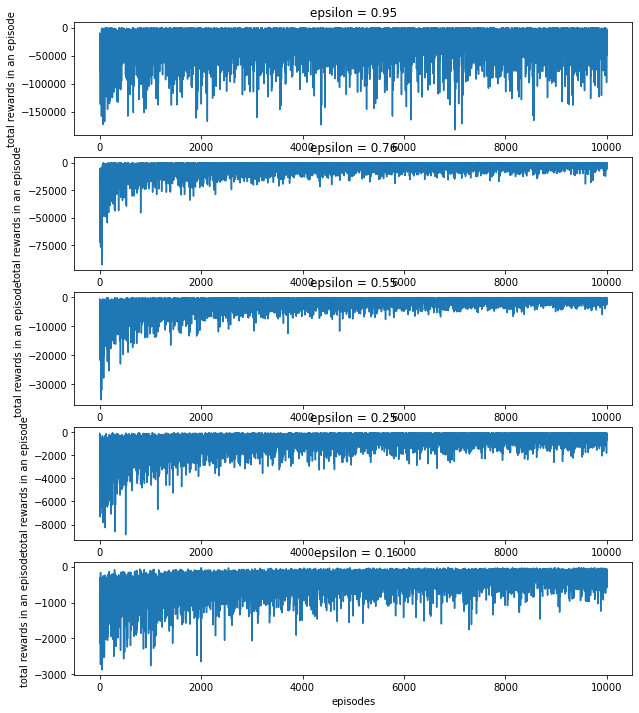

In [ ]:
ep  = [1000]
epsilon = [0.95, 0.76, 0.55, 0.25, 0.1]
i = 0
q1=[]
q2=[]
q3=[]
q4=[]
plt.figure(figsize = (10,12))
Qsa_egreedy = []
for epi in epsilon:
  i+=1
  q,rew,ep = qlearningeps(env,0.0001,0.99,10000,epi)
  Qsa_egreedy.append(q)
  q1.append((q[36][0] + q[36][1]+q[36][2] + q[36][3])/4)
  q2.append((q[4][0] + q[4][1] + q[4][2] + q[4][3])/4)
  q3.append((q[19][0] + q[19][1] + q[19][2] + q[19][3])/4)
  q4.append((q[33][0] + q[33][1] + q[33][2] + q[33][3])/4)

  plt.subplot(5,1,i)
  plt.plot(ep,rew)
  plt.title(f'epsilon = {epi}')
  plt.xlabel('episodes')
  plt.ylabel('total rewards in an episode')

The graphs shows that the agents reward does converge meaning it does learn but not enough as the rewards are still fluctuating and between -100 to -500 which means agent still wont reach to the cookie.

In [ ]:
rewards_egreedy = []
for i in Qsa_egreedy:
  iter = 0 
  cur_state = env.reset()[0]
  sum_r = 0
  while(True):
    iter+=1
    action = np.argmax(i[cur_state])
    new_state,r,temp,info,extra = env.step(action)
    sum_r+=r
    cur_state = new_state
    if(temp == True or iter>=100):
      break
  rewards_egreedy.append(sum_r)

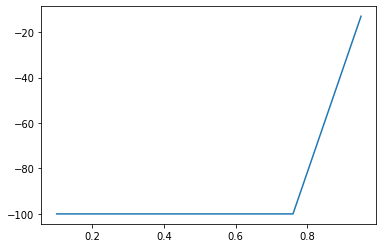

In [ ]:
plt.plot(epsilon,rewards_egreedy)

The total reward for the final policy is around -13 for epsilon near 1

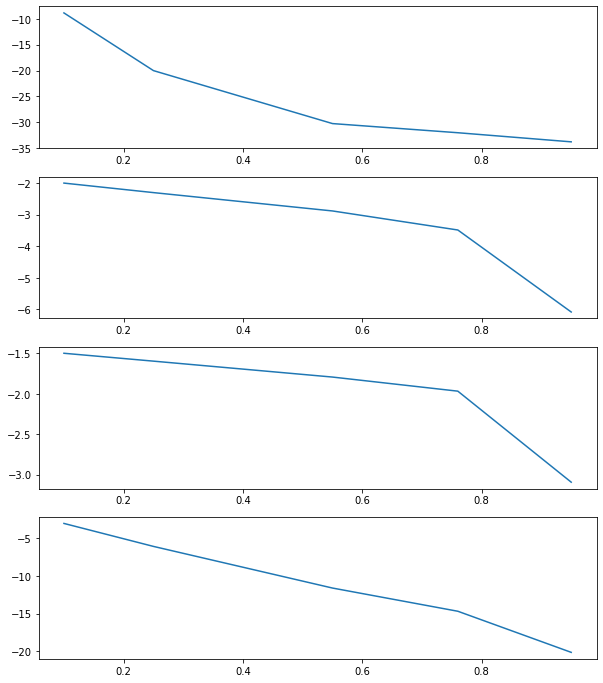

In [ ]:
plt.figure(figsize = (10,12))
plt.subplot(4,1,1)
plt.plot(epsilon,q1)
plt.subplot(4,1,2)
plt.plot(epsilon,q2)
plt.subplot(4,1,3)
plt.plot(epsilon,q3)
plt.subplot(4,1,4)
plt.plot(epsilon,q4)

These graphs shows that the Q values of the given states are less negative for epsilon near 0

## render for Epsilon = 0.95

In [ ]:
path = './cwq2.mp4'

img_to_vid(Qsa_egreedy[0],path) 

video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5


36 0
24 1
25 1
26 1
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 1
35 2


# render for epsilon = 0.76

In [ ]:
path = './cwq2.mp4'

img_to_vid(Qsa_egreedy[1],path) 

video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5


36 0
24 1
25 1
26 1
27 1
28 1
29 1
30 1
31 1
32 1
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2
33 0
21 2


# render for epsilon = 0.55

In [ ]:
path = './cwq2.mp4'

img_to_vid(Qsa_egreedy[2],path)

video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5


36 0
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0
12 2
24 0


# render for epsilon = 0.25

In [ ]:
path = './cwq2.mp4'

img_to_vid(Qsa_egreedy[3],path)

video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5


36 0
24 0
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2
12 0
0 2


# render for epsilon = 0.1

In [ ]:
path = './cwq2.mp4'

img_to_vid(Qsa_egreedy[4],path)

video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5


36 0
24 0
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3
12 3


# ***Q3***

we can see that a purely random policy works poorly because it always chooses a random action and hence the robot never converges this can be seen from the graphs of total rewards vs episdodes that rewards still fluctuated. but thats diffrent from what we saw in the epsilon greedy case where we can see the total rewards converging. hence with inreasing number of iteration we can gaurentee that the agent will get to the cookie. The random policy is a special case of Epsilon greedy policy when we take epsilon to be 1.

# **Q4**

Streaming output truncated to the last 5000 lines.
-36
7502
-56
7503
-47
7504
-186
7505
-34
7506
-33
7507
-40
7508
-26
7509
-51
7510
-58
7511
-38
7512
-48
7513
-42
7514
-54
7515
-37
7516
-47
7517
-27
7518
-40
7519
-39
7520
-49
7521
-77
7522
-27
7523
-47
7524
-36
7525
-27
7526
-45
7527
-49
7528
-31
7529
-44
7530
-54
7531
-52
7532
-49
7533
-40
7534
-33
7535
-50
7536
-51
7537
-27
7538
-33
7539
-68
7540
-26
7541
-36
7542
-47
7543
-60
7544
-141
7545
-35
7546
-35
7547
-50
7548
-27
7549
-74
7550
-31
7551
-35
7552
-38
7553
-23
7554
-58
7555
-63
7556
-34
7557
-45
7558
-54
7559
-32
7560
-29
7561
-56
7562
-57
7563
-29
7564
-138
7565
-59
7566
-36
7567
-38
7568
-51
7569
-53
7570
-22
7571
-44
7572
-74
7573
-28
7574
-23
7575
-38
7576
-38
7577
-47
7578
-50
7579
-36
7580
-54
7581
-42
7582
-29
7583
-180
7584
-60
7585
-53
7586
-42
7587
-22
7588
-45
7589
-55
7590
-32
7591
-27
7592
-40
7593
-87
7594
-36
7595
-36
7596
-22
7597
-46
7598
-35
7599
-30
7600
-70
7601
-51
7602
-25
7603
-35
7604
-48
7605
-39
7606


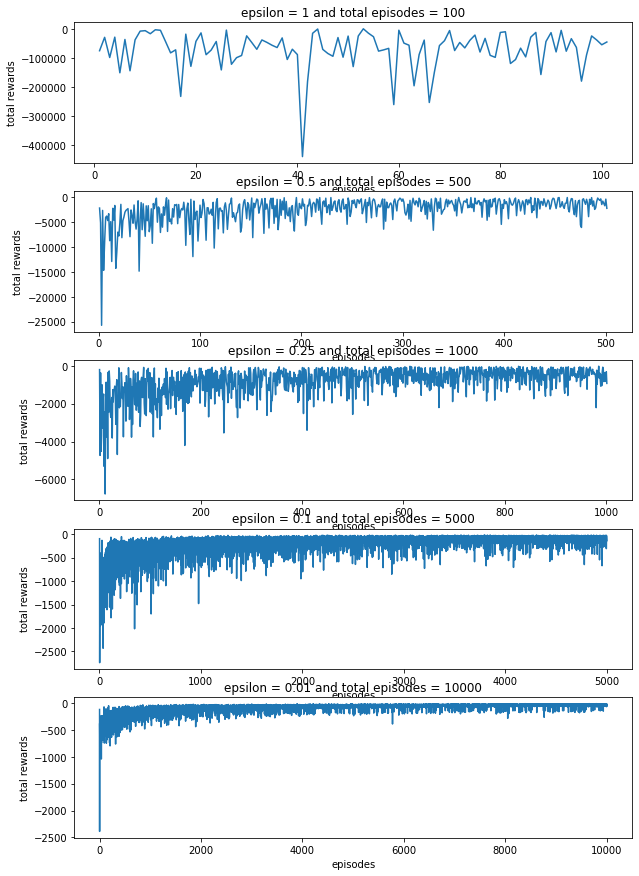

In [ ]:
#as we increase episodes we deacrease the Epsilon
Eps = [1,0.5,0.25,0.1,0.01]
episodes = [100,500,1000,5000,10000]
Qsa_Egreedy = []
plt.figure(figsize = (10,15))
for i in range(len(Eps)):
  q,rew,eps = qlearningeps(env,0.001,0.99,episodes[i],Eps[i])
  Qsa_Egreedy.append(q)
  plt.subplot(5,1,i+1)
  plt.plot(eps,rew)
  plt.xlabel('episodes')
  plt.ylabel('total rewards')
  plt.title(f'epsilon = {Eps[i]} and total episodes = {episodes[i]}')

# render for Epsilon = 1 and total episodes = 100

In [ ]:
path = './cwq2.mp4'

img_to_vid(Qsa_Egreedy[0],path)

video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5


36 0
24 1
25 1
26 1
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 0
22 1
23 2
35 3
34 0
22 1
23 2
35 3
34 0
22 1
23 2
35 3
34 0
22 1
23 2
35 3
34 0
22 1
23 2
35 3
34 0
22 1
23 2
35 3
34 0
22 1
23 2
35 3
34 0
22 1
23 2
35 3
34 0
22 1
23 2
35 3
34 0
22 1
23 2
35 3
34 0
22 1
23 2
35 3
34 0
22 1
23 2
35 3
34 0
22 1
23 2
35 3
34 0
22 1
23 2
35 3
34 0
22 1
23 2
35 3
34 0
22 1
23 2
35 3
34 0
22 1
23 2
35 3
34 0
22 1
23 2
35 3
34 0
22 1
23 2
35 3
34 0
22 1
23 2
35 3
34 0
22 1
23 2
35 3
34 0
22 1
23 2
35 3
34 0


## Render for epsilon = 0.5 and episodes = 500

In [ ]:
path = './cwq2.mp4'

img_to_vid(Qsa_Egreedy[1],path)

video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5


36 0
24 1
25 0
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0
1 3
0 2
12 1
13 0


# Render for Epsilon = 0.25 and episodes = 1000

In [ ]:
path = './cwq2.mp4'

img_to_vid(Qsa_Egreedy[2],path)

video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5


36 0
24 1
25 1
26 1
27 1
28 1
29 1
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1
31 3
30 1


# Render for epsilon = 0.1 and episodes = 5000

In [ ]:
path = './cwq2.mp4'

img_to_vid(Qsa_Egreedy[3],path)

video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5


36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2
36 0
24 2


# render for epsilon = 0.5 and episodes = 10000

In [ ]:
path = './cwq2.mp4'

img_to_vid(Qsa_Egreedy[4],path)

video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5


36 0
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3
24 3




---



# **Lunar Lander**

## ***On Lunar Lander (Box 2D)*** 

Q1. Consider $Q_0$(s, a) = 0 $\forall$ (s,a),  $\epsilon= 0.1 $ and $\alpha$ = 0.01 and implement SARSA and Expected SARSA. Plot the graphs for:  episode vs. max-time step and episode vs. average-reward in each case. State your observations. Render 3 videos for the initial, mid and final stages of the learning process for both the methods. **(20 points).**

Q2. Experiment with different $\alpha$ = [0.0005,0.005,0.01,0.1] and $\epsilon$ = [0.9, 0.5, 0.3, 0.1] combination for SARSA and Expected  SARSA agents. Discuss how changing $\alpha$ and $\epsilon$ affect the agent’s learning performance. Include graphs to help with your explanation. Also comment on best combination along with rendering its video. **(15 points).**


Q3. Implement SARSA($\lambda$) with $\lambda = 0.5$ and the best combination of the $\alpha$ and $\epsilon$ values from the previous question Q2. Compare the performance of SARSA($\lambda$) with that of plain SARSA algorithm. **(10 points).**

Discretize

In [ ]:
#since the state of Lunar lander is a continous 8d array we need to discretize those 8 values
#given below is a dicretization that i followed from the final research paper: https://web.stanford.edu/class/aa228/reports/2019/final8.pdf

def discretize(state):
    state = list(state)
    discrete_state = (min(2, max(-2, int((state[0]) / 0.05))),min(2, max(-2, int((state[1]) / 0.1))), min(2, max(-2, int((state[2]) / 0.1))), min(2, max(-2, int((state[3]) / 0.1))), min(2, max(-2, int((state[4]) / 0.1))), min(2, max(-2, int((state[5]) / 0.1))), int(state[6]),int(state[7]))
    discrete_state = tuple(discrete_state)
    return discrete_state

Code to display the render in video format

In [ ]:
def img_to_vid_lunarlander(q,path):
  env = gym.make('LunarLander-v2',render_mode="human")
  state = env.reset()[0]

  state = tuple(state)
  state = discretize(state)
  iter = 0
  img = []
  while True:
    iter+=1
    A = np.argmax(q.get(state))
    nxt_state,r,temp,info,extra = env.step(A)
    print(state,A)
    img.append(render())
    nxt_state = tuple(nxt_state)
    nxt_state = discretize(nxt_state)
    state = nxt_state
    if(temp == True or iter>=100):
      break
  (img_to_video_lunarlander(img,path,4))

In [ ]:
def img_to_video_lunarlander(img_arr,path,fps):
  h,w,layers = img_arr[0].shape
  size = (w,h)
  out = cv2.VideoWriter(path,cv2.VideoWriter_fourcc(*'DIVX'),fps,size)
  for i in range(len(img_arr)):
    out.write(img_arr[i])
  out.release

In [ ]:
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML

def display_video_lunarlander(video):
    fig = plt.figure(figsize=(9,6))  #Display size specification

    mov = []
    for i in range(len(video)):  #Append videos one by one to mov
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    #Animation creation
    anime = animation.ArtistAnimation(fig, mov, interval=500, repeat_delay=1000)

    plt.close()
    return anime

#Sarsa

In [ ]:
import matplotlib.pyplot as plt
import collections
import random

env = gym.make("LunarLander-v2",render_mode="none")
env.reset()
def egreed(env,cur_state,q,eps):
    prob = np.random.random()

    if prob < eps:
        return random.randint(0,3)
    else:
        if cur_state in q:
          return np.argmax(q.get(cur_state))
        else:
          return np.argmax([0,0,0,0])



def sarsa(env,alpha,gamma,episode,eps):
  q_states = {}
  rew = []
  epi = []
  ep = 0
  while(ep<episode):
    ep+=1
    env.reset()
    cur_state = env.reset()[0]
    cur_state = tuple(cur_state)
    rewards = 0
    cur_state = discretize(cur_state)
    action = egreed(env,cur_state,q_states,eps)
    iter = 0
    while True:
      iter+=1
      new_state,r,temp,info,extra = env.step(action)
      new_state = discretize(new_state)
      rewards+=r
      new_state = tuple(new_state)
      ac = egreed(env,new_state,q_states,eps)
      if cur_state in q_states:
        if new_state in q_states:
          q_states[cur_state][action] = q_states[cur_state][action] + alpha*(r + gamma*q_states[new_state][ac] - q_states[cur_state][action])
        else:
          q_states[cur_state][action] = q_states[cur_state][action] + alpha*(r - q_states[cur_state][action])
      else:
        q_states[cur_state] = np.zeros(4)
      cur_state = new_state
      action  = ac
      if(temp == True or iter>=500):
        print(ep)
        print(iter)
        break
    epi.append(ep)
    rew.append(rewards)

  return q_states,rew,epi


/usr/local/lib/python3.8/dist-packages/gymnasium/envs/registration.py:628: UserWarning: WARN: The environment is being initialised with render_mode='none' that is not in the possible render_modes (['human', 'rgb_array']).
  logger.warn(


# Q1 for sarsa

1
81
2
77
3
130
4
109
5
172
6
300
7
97
8
96
9
98
10
84
11
214
12
142
13
147
14
126
15
147
16
148
17
156
18
147
19
130
20
98
21
288
22
151
23
188
24
178
25
173
26
217
27
146
28
206
29
104
30
171
31
196
32
128
33
151
34
173
35
112
36
202
37
138
38
140
39
142
40
147
41
163
42
149
43
182
44
137
45
170
46
120
47
113
48
149
49
147
50
127
51
156
52
147
53
184
54
145
55
131
56
180
57
119
58
181
59
148
60
113
61
138
62
137
63
135
64
129
65
151
66
163
67
154
68
134
69
172
70
165
71
151
72
118
73
84
74
128
75
107
76
138
77
180
78
138
79
121
80
142
81
169
82
124
83
131
84
158
85
140
86
124
87
139
88
156
89
156
90
205
91
120
92
206
93
179
94
215
95
143
96
127
97
155
98
264
99
136
100
143
101
154
102
146
103
140
104
262
105
176
106
135
107
177
108
174
109
149
110
107
111
127
112
131
113
127
114
152
115
124
116
164
117
130
118
136
119
136
120
204
121
175
122
146
123
162
124
235
125
216
126
152
127
151
128
160
129
118
130
186
131
126
132
133
133
147
134
160
135
165
136
129
137
138
138
182
139
181
140


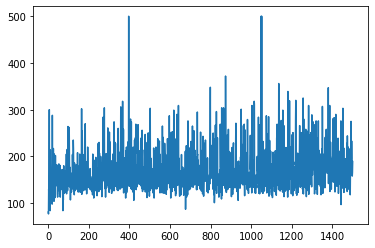

In [ ]:
def sarsaq1(env,alpha,gamma,episode,eps):
  q_states = {}
  rew = []
  epi = []
  ep = 0
  steps = []
  while(ep<episode):
    ep+=1
    env.reset()
    cur_state = env.reset()[0]
    cur_state = tuple(cur_state)
    rewards = 0
    cur_state = discretize(cur_state)
    action = egreed(env,cur_state,q_states,eps)
    iter = 0
    while True:
      iter+=1
      new_state,r,temp,info,extra = env.step(action)
      new_state = discretize(new_state)
      rewards+=r
      new_state = tuple(new_state)
      ac = egreed(env,new_state,q_states,eps)
      if cur_state in q_states:
        if new_state in q_states:
          q_states[cur_state][action] = q_states[cur_state][action] + alpha*(r + gamma*q_states[new_state][ac] - q_states[cur_state][action])
        else:
          q_states[cur_state][action] = q_states[cur_state][action] + alpha*(r - q_states[cur_state][action])
      else:
        q_states[cur_state] = np.zeros(4)
      cur_state = new_state
      action  = ac
      if(temp == True or iter>=500):
        print(ep)
        print(iter)

        break
    epi.append(ep)
    steps.append(iter)
    rew.append(rewards)

  return q_states,rew,epi,steps


alpha = 0.01
epsilon = 0.1
q,reward,epi,step = sarsaq1(env,alpha,0.95,1500,epsilon)
plt.plot(epi,step)

# Q2 for sarsa

/usr/local/lib/python3.8/dist-packages/gymnasium/envs/registration.py:628: UserWarning: WARN: The environment is being initialised with render_mode='none' that is not in the possible render_modes (['human', 'rgb_array']).
  logger.warn(


Streaming output truncated to the last 5000 lines.
501
182
502
194
503
181
504
148
505
169
506
236
507
235
508
199
509
198
510
202
511
187
512
139
513
155
514
165
515
276
516
232
517
158
518
140
519
227
520
282
521
163
522
136
523
155
524
131
525
290
526
158
527
268
528
240
529
294
530
348
531
188
532
245
533
161
534
166
535
124
536
123
537
140
538
136
539
404
540
168
541
224
542
156
543
161
544
207
545
150
546
168
547
272
548
230
549
209
550
114
551
230
552
154
553
203
554
121
555
230
556
201
557
209
558
243
559
154
560
292
561
124
562
322
563
133
564
233
565
212
566
215
567
216
568
189
569
137
570
249
571
242
572
135
573
206
574
171
575
232
576
176
577
246
578
152
579
158
580
245
581
197
582
218
583
178
584
195
585
176
586
170
587
176
588
212
589
227
590
188
591
147
592
191
593
187
594
149
595
207
596
238
597
135
598
192
599
205
600
239
601
212
602
274
603
114
604
130
605
197
606
433
607
293
608
249
609
161
610
500
611
124
612
242
613
155
614
266
615
203
616
190
617
180
618
154
619
1

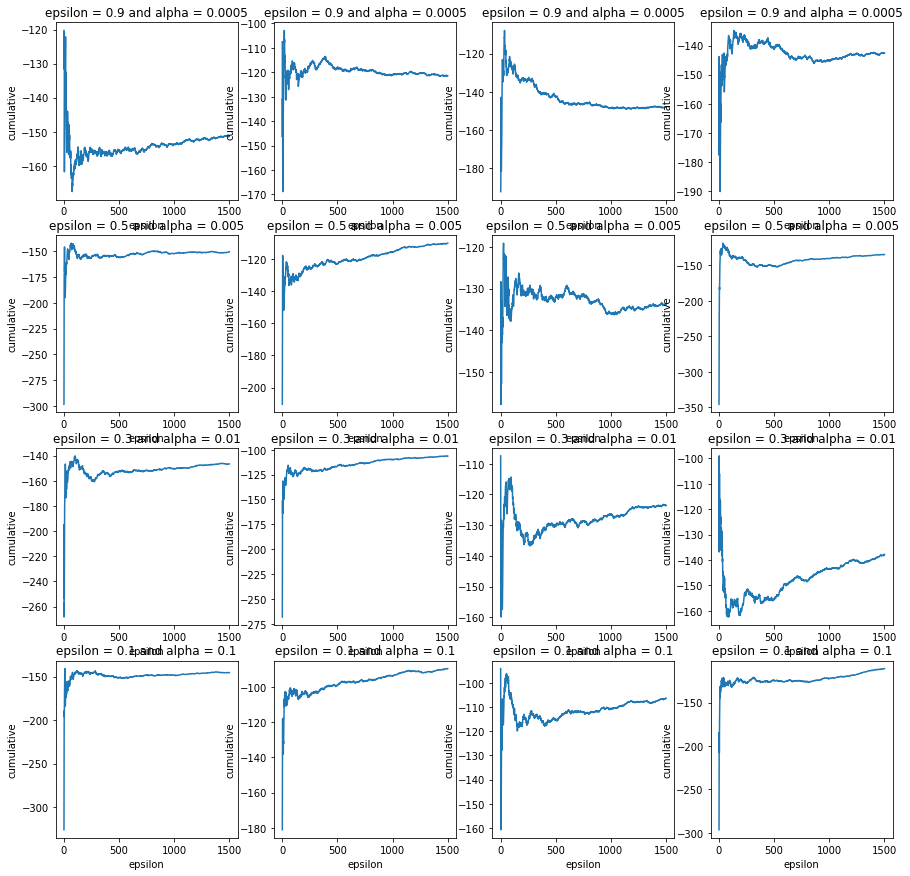

In [ ]:
import gymnasium as gym
env = gym.make("LunarLander-v2",render_mode="none")

ep  = [1000]
al = [0.0005,0.005,0.01,0.1]
Epsilon = [0.9, 0.5, 0.3, 0.1]

plt.figure(figsize = (15,15))
Q_sarsa = [[{} for j in range(4)] for i in range(4)]
temp = 0
for i in range(len(al)):
  for j in range(len(Epsilon)):
    temp+=1
    q,rew,eps,steps = sarsa(env,al[i],0.95,1500,Epsilon[j])
    Q_sarsa[i][j] = q
    a = 0
    sum = []
    for j in range(len(rew)):
      a = a+rew[j]
      sum.append(a/(j+1))
    plt.subplot(4,4,temp)
    plt.plot(eps,sum)
    plt.xlabel('epsilon')
    plt.ylabel('cumulative')
    plt.title(f'epsilon = {Epsilon[i]} and alpha = {al[i]}')

# finding out the best epsilon and alpha for sarsa

In [ ]:
maxx = -float('inf')
best_i = 0
best_j = 0
for i in range(4):
  for j in range(4):
    env = gym.make('LunarLander-v2',render_mode="human")
    state = env.reset()[0]

    state = tuple(state)
    state = discretize(state)
    iter = 0
    img = []
    rewards = 0
    while True:
      iter+=1
      A = np.argmax(Q_sarsa[2][3].get(state))
      nxt_state,r,temp,info,extra = env.step(A)
      rewards+=r
      print(state,A)
      img.append(render())
      nxt_state = tuple(nxt_state)
      nxt_state = discretize(nxt_state)
      state = nxt_state
      if(temp == True or iter>=100):
        break
    if(rewards>maxx):
      maxx = rewards
      best_i = i
      best_j = j


(0, 2, -1, -2, 0, 0, 0, 0) 2
(0, 2, -1, -2, 0, 0, 0, 0) 2
(0, 2, -1, -2, 0, 0, 0, 0) 2
(0, 2, -1, -2, 0, 0, 0, 0) 2
(0, 2, -2, -2, 0, 0, 0, 0) 2
(0, 2, -1, -2, 0, 0, 0, 0) 2
(0, 2, -2, -1, 0, 0, 0, 0) 2
(0, 2, -1, -1, 0, 0, 0, 0) 2
(0, 2, -1, -1, 0, 0, 0, 0) 2
(0, 2, -1, -1, 0, 0, 0, 0) 2
(0, 2, -1, -1, 0, 0, 0, 0) 2
(0, 2, -1, 0, 0, 0, 0, 0) 3
(0, 2, -1, -1, 0, 0, 0, 0) 2
(0, 2, -1, -1, 0, 0, 0, 0) 2
(0, 2, -1, 0, 0, 0, 0, 0) 3
(0, 2, -1, -1, 0, 0, 0, 0) 2
(0, 2, -1, 0, 0, 0, 0, 0) 3
(0, 2, -1, -1, 0, 0, 0, 0) 2
(0, 2, -1, -1, 0, 0, 0, 0) 2
(0, 2, -1, 0, 0, 0, 0, 0) 3
(0, 2, -1, -1, 0, -1, 0, 0) 2
(0, 2, -1, 0, 0, -1, 0, 0) 2
(0, 2, -1, 0, 0, -1, 0, 0) 2
(0, 2, -1, 0, 0, -1, 0, 0) 2
(0, 2, -1, 0, 0, -1, 0, 0) 2
(0, 2, -1, 0, 0, -1, 0, 0) 2
(0, 2, -1, 0, 0, -1, 0, 0) 2
(0, 2, -1, 0, 0, -1, 0, 0) 2
(0, 2, -1, 0, 0, -1, 0, 0) 2
(0, 2, -1, 0, 0, -1, 0, 0) 2
(-1, 2, -1, 0, 0, -1, 0, 0) 3
(-1, 2, -1, 0, 0, -1, 0, 0) 3
(-1, 2, 0, 0, 0, -1, 0, 0) 0
(-1, 2, 0, 0, 0, -1, 0, 0) 0
(-1, 2, 0, 0, 0

In [ ]:
print(al[best_i])
print(Epsilon[best_j])

0.005
0.3


# rendering the best video

In [ ]:
path = './llv2.mp4'

img_to_vid_lunarlander(Q_sarsa[best_i][best_j],path)

video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video_lunarlander(video).to_html5_video())  #Inline video display in HTML5

(0, 2, 2, -1, 0, 0, 0, 0) 2
(0, 2, 2, -1, 0, 0, 0, 0) 2
(0, 2, 2, -1, 0, 0, 0, 0) 2
(0, 2, 2, 0, 0, 0, 0, 0) 1
(0, 2, 2, 0, 0, 0, 0, 0) 1
(0, 2, 1, -1, 0, 0, 0, 0) 2
(0, 2, 1, -1, 0, 0, 0, 0) 2
(0, 2, 1, 0, 0, 0, 0, 0) 1
(0, 2, 1, -1, 0, 0, 0, 0) 2
(0, 2, 1, 0, 0, 0, 0, 0) 1
(0, 2, 1, -1, 0, 1, 0, 0) 2
(0, 2, 1, 0, 0, 1, 0, 0) 1
(0, 2, 1, -1, 0, 1, 0, 0) 2
(0, 2, 1, -1, 0, 1, 0, 0) 2
(0, 2, 1, 0, 0, 1, 0, 0) 1
(0, 2, 1, -1, 0, 1, 0, 0) 2
(0, 2, 1, 0, 0, 1, 0, 0) 1
(0, 2, 1, -1, 0, 2, 0, 0) 2
(0, 2, 1, 0, 0, 2, 0, 0) 2
(0, 2, 1, 0, 0, 2, 0, 0) 2
(0, 2, 1, 0, 1, 2, 0, 0) 2
(0, 2, 1, 0, 1, 2, 0, 0) 2
(0, 2, 1, 0, 1, 2, 0, 0) 2
(0, 2, 0, 0, 1, 2, 0, 0) 0
(0, 2, 0, 0, 1, 2, 0, 0) 0
(0, 2, 0, 0, 1, 2, 0, 0) 0
(0, 2, 0, 0, 1, 2, 0, 0) 0
(0, 2, 0, -1, 1, 2, 0, 0) 2
(0, 2, 0, -1, 1, 2, 0, 0) 2
(0, 2, 0, 0, 2, 2, 0, 0) 1
(0, 2, 0, -1, 2, 2, 0, 0) 2
(0, 2, 0, 0, 2, 2, 0, 0) 1
(0, 2, 0, -1, 2, 2, 0, 0) 2
(0, 2, 0, 0, 2, 2, 0, 0) 1
(0, 2, 0, -1, 2, 2, 0, 0) 2
(0, 2, 0, 0, 2, 2, 0, 0) 1
(1, 2, 0, -1

# Expected sarsa

In [ ]:
def expected_sarsa(env,alpha,gamma,episode,eps):
    q_states = {}
    rew = []
    epi = []
    ep = 0
    while(ep<episode):
      ep+=1
      env.reset()
      cur_state = env.reset()[0]
      cur_state = tuple(cur_state)
      rewards = 0
      cur_state = discretize(cur_state)
      action = egreed(env,cur_state,q_states,eps)
      iter = 0
      while True:
        iter+=1
        new_state,r,temp,info,extra = env.step(action)
        new_state = discretize(new_state)
        rewards+=r
        new_state = tuple(new_state)
        ac = egreed(env,new_state,q_states,eps)
        if cur_state in q_states:
          if new_state in q_states:
            m = 0
            for i in range(len(q_states[new_state])):
              if(i == ac):
                m+= (1-eps)*q_states[new_state][action]
              else:
                m+= eps*q_states[new_state][action]
            q_states[cur_state][action] = q_states[cur_state][action] + alpha*(r + gamma*m - q_states[cur_state][action])
          else:
            q_states[cur_state][action] = q_states[cur_state][action] + alpha*(r - q_states[cur_state][action])
        else:
          q_states[cur_state] = np.zeros(4)
        cur_state = new_state
        action  = ac
        if(temp == True or iter>=500):
          print(ep)
          print(iter)
          break
      epi.append(ep)
      rew.append(rewards)
    return q_states,rew,epi



# Q1 for expected sarsa

In [ ]:
def expected_sarsaq1(env,alpha,gamma,episode,eps):
    q_states = {}
    rew = []
    epi = []
    ep = 0
    steps = []
    while(ep<episode):
      ep+=1
      env.reset()
      cur_state = env.reset()[0]
      cur_state = tuple(cur_state)
      rewards = 0
      cur_state = discretize(cur_state)
      action = egreed(env,cur_state,q_states,eps)
      iter = 0
      while True:
        iter+=1
        new_state,r,temp,info,extra = env.step(action)
        new_state = discretize(new_state)
        rewards+=r
        new_state = tuple(new_state)
        ac = egreed(env,new_state,q_states,eps)
        if cur_state in q_states:
          if new_state in q_states:
            m = 0
            for i in range(len(q_states[new_state])):
              if(i == ac):
                m+= (1-eps)*q_states[new_state][action]
              else:
                m+= eps*q_states[new_state][action]
            q_states[cur_state][action] = q_states[cur_state][action] + alpha*(r + gamma*m - q_states[cur_state][action])
          else:
            q_states[cur_state][action] = q_states[cur_state][action] + alpha*(r - q_states[cur_state][action])
        else:
          q_states[cur_state] = np.zeros(4)
        cur_state = new_state
        action  = ac
        if(temp == True or iter>=500):
          print(ep)
          print(iter)
          break
      epi.append(ep)
      steps.append(iter)
      rew.append(rewards)
    return q_states,rew,epi,steps

alpha = 0.01
epsilon = 0.1
q,reward,epi,step = expected_sarsaq1(env,alpha,0.99,1500,epsilon)


1
73
2
71
3
97
4
111
5
117
6
150
7
148
8
93
9
169
10
201
11
127
12
183
13
227
14
150
15
151
16
149
17
164
18
98
19
104
20
182
21
102
22
169
23
134
24
151
25
178
26
156
27
121
28
210
29
154
30
176
31
164
32
132
33
140
34
206
35
121
36
140
37
138
38
134
39
146
40
120
41
129
42
139
43
134
44
116
45
124
46
113
47
134
48
127
49
218
50
145
51
173
52
126
53
144
54
135
55
153
56
151
57
218
58
185
59
191
60
177
61
147
62
148
63
133
64
150
65
128
66
133
67
135
68
171
69
133
70
195
71
137
72
86
73
149
74
139
75
133
76
221
77
193
78
141
79
150
80
142
81
128
82
169
83
75
84
129
85
154
86
124
87
124
88
181
89
150
90
130
91
136
92
151
93
129
94
173
95
155
96
137
97
111
98
191
99
163
100
214
101
229
102
151
103
162
104
152
105
152
106
160
107
125
108
118
109
127
110
129
111
167
112
136
113
170
114
133
115
131
116
126
117
132
118
144
119
148
120
143
121
103
122
167
123
146
124
130
125
157
126
132
127
147
128
137
129
139
130
131
131
142
132
179
133
159
134
195
135
138
136
118
137
156
138
180
139
167
140

# Q2 expected sarsa 

Streaming output truncated to the last 5000 lines.
501
183
502
267
503
354
504
202
505
129
506
187
507
286
508
168
509
500
510
155
511
227
512
217
513
338
514
111
515
205
516
327
517
121
518
208
519
278
520
123
521
195
522
123
523
123
524
181
525
211
526
364
527
252
528
303
529
347
530
134
531
278
532
314
533
167
534
230
535
327
536
500
537
242
538
134
539
328
540
122
541
183
542
183
543
415
544
207
545
212
546
117
547
388
548
207
549
258
550
337
551
224
552
215
553
156
554
76
555
150
556
116
557
262
558
315
559
172
560
250
561
203
562
128
563
154
564
156
565
429
566
219
567
265
568
351
569
149
570
127
571
121
572
229
573
141
574
135
575
148
576
126
577
200
578
78
579
297
580
217
581
251
582
100
583
219
584
141
585
342
586
209
587
226
588
184
589
266
590
105
591
168
592
182
593
119
594
308
595
229
596
181
597
354
598
184
599
115
600
175
601
414
602
210
603
350
604
315
605
244
606
354
607
139
608
448
609
122
610
129
611
231
612
172
613
300
614
138
615
223
616
125
617
156
618
346
619
212

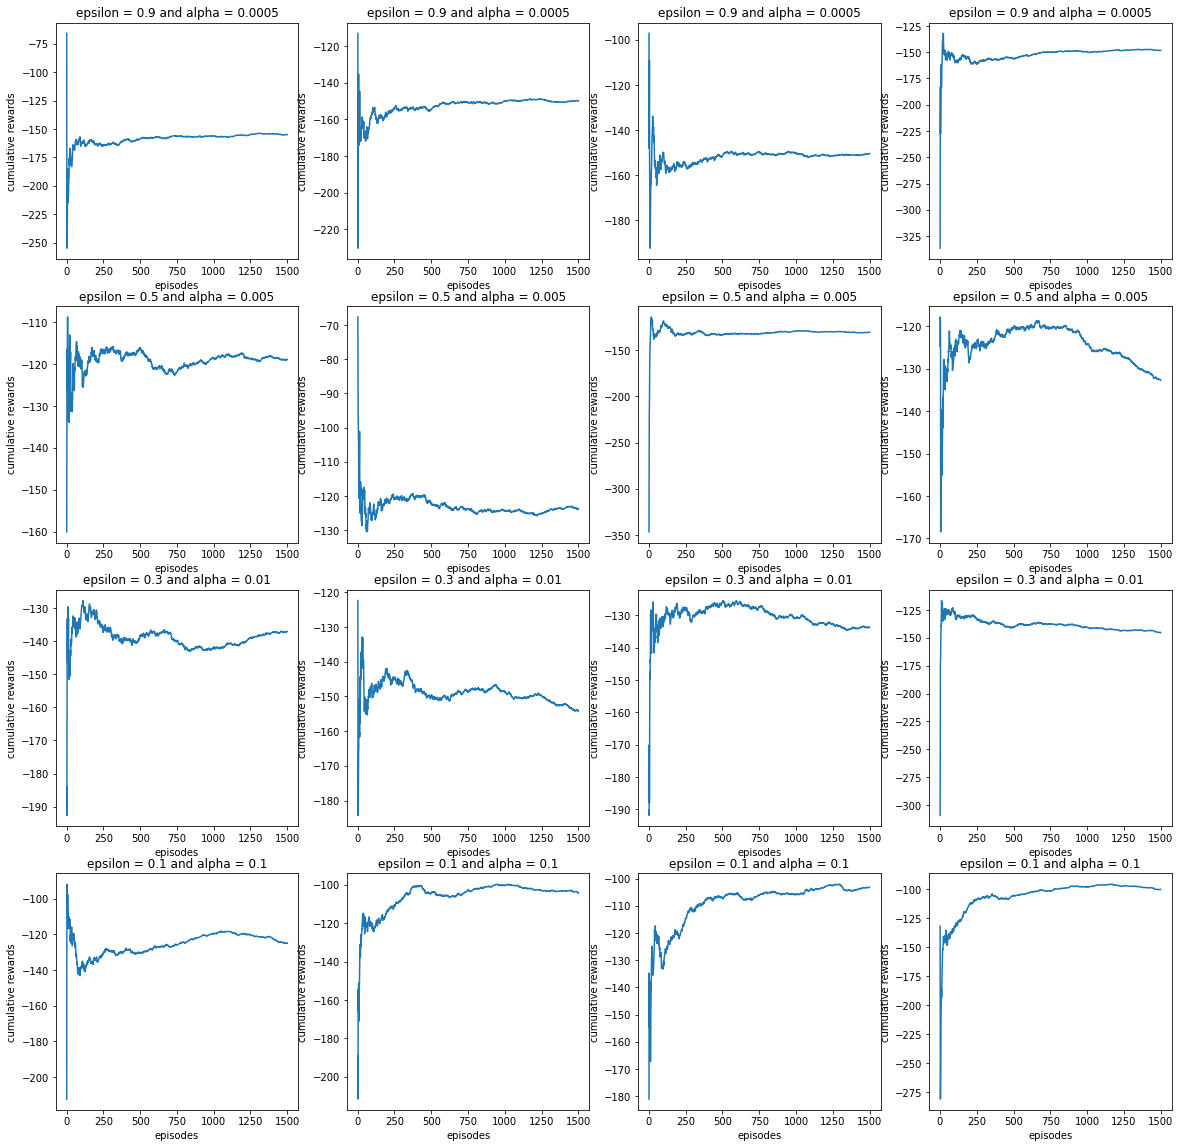

In [ ]:
import gymnasium as gym
env = gym.make("LunarLander-v2",render_mode="none")

ep  = [1000]
al = [0.0005,0.005,0.01,0.1]
Epsilon = [0.9, 0.5, 0.3, 0.1]
Q_expected_sarsa = [[{} for j in range(4)] for i in range(4)]

plt.figure(figsize = (20,20))
temp = 0
for i in range(len(al)):
  for j in range(len(Epsilon)):
    temp+=1
    q,rew,eps = expected_sarsa(env,al[i],0.99,1500,Epsilon[i])
    Q_expected_sarsa[i][j] = q
    a = 0
    sum = []
    for j in range(len(rew)):
      a = a+rew[j]
      sum.append(a/(j+1))
    plt.subplot(4,4,temp)
    plt.plot(eps,sum)
    plt.xlabel('episodes')
    plt.ylabel('cumulative rewards')
    plt.title(f'epsilon = {Epsilon[i]} and alpha = {al[i]}')

# finding out the best alpha and epsilon for expected sarsa

In [ ]:
maxx = -float('inf')
best_i_es = 0
best_j_es = 0
for i in range(4):
  for j in range(4):
    env = gym.make('LunarLander-v2',render_mode="human")
    state = env.reset()[0]

    state = tuple(state)
    state = discretize(state)
    iter = 0
    img = []
    rewards = 0
    while True:
      iter+=1
      A = np.argmax(Q_expected_sarsa[i][j].get(state))
      nxt_state,r,temp,info,extra = env.step(A)
      rewards+=r
      print(state,A)
      img.append(render())
      nxt_state = tuple(nxt_state)
      nxt_state = discretize(nxt_state)
      state = nxt_state
      if(temp == True or iter>=100):
        break
    if(rewards>maxx):
      maxx = rewards
      best_i_es = i
      best_j_es = j


(0, 2, -2, 0, 0, 1, 0, 0) 3
(0, 2, -2, 0, 0, 0, 0, 0) 3
(0, 2, -2, -1, 0, 0, 0, 0) 2
(0, 2, -2, 0, 0, 0, 0, 0) 3
(0, 2, -2, -1, 0, 0, 0, 0) 2
(0, 2, -2, 0, 0, 0, 0, 0) 3
(0, 2, -2, -1, 0, 0, 0, 0) 2
(0, 2, -2, 0, 0, 0, 0, 0) 3
(0, 2, -2, -1, 0, 0, 0, 0) 2
(-1, 2, -2, 0, 0, 0, 0, 0) 3
(-1, 2, -2, -1, 0, 0, 0, 0) 2
(-1, 2, -2, -1, 0, -1, 0, 0) 2
(-1, 2, -2, -1, 0, -1, 0, 0) 2
(-1, 2, -2, 0, 0, -1, 0, 0) 3
(-1, 2, -2, -1, 0, -1, 0, 0) 2
(-1, 2, -2, 0, 0, -1, 0, 0) 3
(-1, 2, -2, -1, 0, -2, 0, 0) 2
(-1, 2, -2, 0, 0, -2, 0, 0) 2
(-2, 2, -2, 0, 0, -2, 0, 0) 3
(-2, 2, -2, 0, 0, -2, 0, 0) 3
(-2, 2, -2, -1, 0, -2, 0, 0) 2
(-2, 2, -2, 0, -1, -2, 0, 0) 2
(-2, 2, -2, 0, -1, -2, 0, 0) 2
(-2, 2, -2, 0, -1, -2, 0, 0) 2
(-2, 2, -2, 0, -1, -2, 0, 0) 2
(-2, 2, -2, 0, -1, -2, 0, 0) 2
(-2, 2, -2, 0, -1, -2, 0, 0) 2
(-2, 2, -2, 0, -2, -2, 0, 0) 0
(-2, 2, -2, 0, -2, -2, 0, 0) 0
(-2, 2, -2, 0, -2, -2, 0, 0) 0
(-2, 2, -2, -1, -2, -2, 0, 0) 2
(-2, 2, -2, 0, -2, -2, 0, 0) 0
(-2, 2, -2, -1, -2, -2, 0, 0) 2
(-2, 2

In [ ]:
print(al[best_i_es])
print(Epsilon[best_j_es])

0.0005
0.1


# render the lunar lander for these values

In [ ]:
path = './llv2.mp4'

img_to_vid_lunarlander(Q_expected_sarsa[best_i_es][best_j_es],path)

video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video_lunarlander(video).to_html5_video())  #Inline video display in HTML5

(0, 2, 2, -2, 0, 0, 0, 0) 2
(0, 2, 2, -2, 0, 0, 0, 0) 2
(0, 2, 2, -2, 0, 0, 0, 0) 2
(0, 2, 2, -2, 0, 0, 0, 0) 2
(0, 2, 2, -2, 0, 0, 0, 0) 2
(0, 2, 2, -2, 0, 0, 0, 0) 2
(0, 2, 2, -2, 0, 0, 0, 0) 2
(0, 2, 2, -2, 0, -1, 0, 0) 2
(0, 2, 2, -1, 0, 0, 0, 0) 2
(0, 2, 2, -1, 0, -1, 0, 0) 1
(0, 2, 2, -1, 0, 0, 0, 0) 2
(0, 2, 2, -1, 0, 0, 0, 0) 2
(0, 2, 2, -1, 0, 0, 0, 0) 2
(0, 2, 2, -1, 0, 0, 0, 0) 2
(0, 2, 2, -1, 0, 0, 0, 0) 2
(0, 2, 2, 0, 0, 0, 0, 0) 1
(0, 2, 2, -1, 0, 0, 0, 0) 2
(1, 2, 2, 0, 0, 0, 0, 0) 1
(1, 2, 2, -1, 0, 0, 0, 0) 2
(1, 2, 2, -1, 0, 0, 0, 0) 2
(1, 2, 2, 0, 0, 0, 0, 0) 1
(1, 2, 2, -1, 0, 0, 0, 0) 2
(1, 2, 2, 0, 0, 0, 0, 0) 1
(1, 2, 2, -1, 0, 0, 0, 0) 2
(1, 2, 2, 0, 0, 0, 0, 0) 1
(1, 2, 2, -1, 0, 1, 0, 0) 2
(1, 2, 2, -1, 0, 1, 0, 0) 2
(1, 2, 2, -1, 0, 1, 0, 0) 2
(1, 2, 2, 0, 0, 1, 0, 0) 1
(1, 2, 2, -1, 0, 1, 0, 0) 2
(1, 2, 2, -1, 0, 1, 0, 0) 2
(1, 2, 2, -1, 0, 1, 0, 0) 2
(1, 2, 2, 0, 0, 1, 0, 0) 1
(1, 2, 2, 0, 0, 1, 0, 0) 1
(1, 2, 2, -1, 0, 2, 0, 0) 1
(1, 2, 2, -1, 0, 2, 0, 0) 

# Sarsa Lambda

/usr/local/lib/python3.8/dist-packages/gymnasium/envs/registration.py:628: UserWarning: WARN: The environment is being initialised with render_mode='none' that is not in the possible render_modes (['human', 'rgb_array']).
  logger.warn(


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


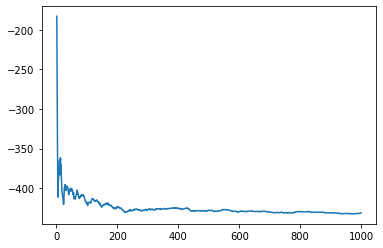

In [ ]:
def sarsalmbda(env,alpha,lmbda,episode,eps):
  q= {}
  e = {}
  delta = 0
  rew = []
  ep = []
  numberOfEpisodes=0
  while(numberOfEpisodes<episode):
    numberOfEpisodes+=1
    cur_state = env.reset()[0]
    cur_state = tuple(cur_state)
    cur_state = discretize(cur_state)
    a = egreed(env,cur_state,q,eps)
    rewards = 0
    while True:
      nextState,r,temp,info,extra = env.step(a)
      rewards+=r
      nextState = tuple(nextState)
      nextState = discretize(nextState)
      ac = egreed(env,nextState,q,eps)
      if q.get(cur_state) is not None and q.get(nextState) is not None:
        delta = r + 0.99*q[nextState][ac] - q[cur_state][a]
      elif q.get(cur_state) is not None:
        delta = r - q[cur_state][a]
      elif q.get(nextState) is not None:
        delta = r + 0.99*q[nextState][ac]
      else:
        delta = r
      if(e.get(cur_state) is not None):
        e[cur_state][a]+=1
      else:
        e[cur_state] = np.zeros(4)
        e[cur_state][a] = 1
      q[cur_state] = np.zeros(4)
      q[nextState] = np.zeros(4)
      for state in q:
        for action in q[state]:
          action = int(action)
          if e.get(state) is not None:
            q[state][action] += alpha*delta*e[state][action]
          else:
            e[state] = np.zeros(4)
          e[state][action] = 0.99*lmbda*e[state][action]
      cur_state = nextState
      a = ac
      if(temp == True):
        print(numberOfEpisodes)
        break
    rew.append(rewards)
    ep.append(numberOfEpisodes)
  return q,rew,ep
import gymnasium as gym
env = gym.make("LunarLander-v2",render_mode="none")

ep  = [1000]
sum = []
for episode in ep:
  q,rew,eps = sarsalmbda(env,0.001,0.5,episode,0.1)
a = 0
for i in range(len(rew)):
  a = a+rew[i]
  sum.append(a/(i+1))
plt.plot(eps,sum)

In [ ]:
print(q)

{(0, 2, 2, -1, 0, -1, 0, 0): array([-0.04046457,  0.05075961, -0.00116089, -0.09625457]), (0, 2, 2, -2, 0, -1, 0, 0): array([-0.31499946, -0.07748408,  5.18202637, -0.53489971]), (1, 2, 2, -2, 0, -1, 0, 0): array([-0.07509194, -0.05238047, -0.05840966, -0.10798476]), (1, 2, 2, -2, 0, 0, 0, 0): array([-0.2212448 ,  0.03864939,  1.4837567 , -0.34482933]), (2, 2, 2, -2, 0, 0, 0, 0): array([-0.05692323,  1.35973087,  0.12253742, -0.18440965]), (2, 2, 2, -2, -1, 0, 0, 0): array([-0.04718014,  0.91691903,  0.02366971, -0.05020986]), (2, 2, 2, -2, 0, 1, 0, 0): array([-0.1616443 ,  0.11104172, 17.3389307 , -0.61398448]), (2, 2, 2, -2, 1, 1, 0, 0): array([-0.08387575, -0.07178743,  1.09867316, -0.09412577]), (2, 2, 2, -2, 1, 2, 0, 0): array([-0.26825807, -0.25263739,  0.8349738 , -0.45053679]), (2, 2, 2, -2, 2, 2, 0, 0): array([-0.22147603, -0.14038988,  1.08005896, -0.37057976]), (2, 1, 2, -2, 2, 2, 0, 0): array([-0.16451313, -0.0550936 ,  0.12238944, -0.03365031]), (2, 0, 2, -2, 2, 2, 0, 0): 

In [ ]:
env = gym.make("LunarLander-v2",render_mode="human")
print(len(q))
state = env.reset()[0]
state = tuple(state)
state= discretize(state)
imgarr = []
while True:
  print(np.argmax(q.get(state)))
  A = np.argmax(q.get(state))
  nxt_state,r,temp,info,extra = env.step(A)
  nxt_state = tuple(nxt_state)
  nxt_state = discretize(nxt_state)
  img.append(render())
  state = nxt_state
  if(temp == True):
    break


2631
1
0
0
0
0
0
0
0
0
0
0
0
0
0
3
3
3
3
3
3
3
3
2
2
2
2
2
2
3
3
3
2
0
0
2
0
2
0
0
0
0
0
2
0
2
2
2
0
0
2
2
2
0
2
2
0
2
0
2
2
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
2
0
0
0
2
3
2
3
0


In [ ]:
path = './llv2.mp4'

img_to_vid_lunarlander(q,path)

video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video_lunarlander(video).to_html5_video())  #Inline video display in HTML5

(0, 2, 2, -2, 0, -1, 0, 0) 2
(0, 2, 2, -2, 0, -1, 0, 0) 2
(0, 2, 2, -2, 0, -1, 0, 0) 2
(0, 2, 2, -2, 0, -1, 0, 0) 2
(0, 2, 2, -2, 0, -1, 0, 0) 2
(0, 2, 2, -2, 0, -1, 0, 0) 2
(0, 2, 2, -2, 0, -1, 0, 0) 2
(0, 2, 2, -2, 0, -1, 0, 0) 2
(0, 2, 2, -2, 0, -1, 0, 0) 2
(1, 2, 2, -2, 0, -1, 0, 0) 1
(1, 2, 2, -2, 0, -1, 0, 0) 1
(1, 2, 2, -2, 0, 0, 0, 0) 2
(1, 2, 2, -2, 0, 0, 0, 0) 2
(1, 2, 2, -2, 0, 0, 0, 0) 2
(1, 2, 2, -2, 0, -1, 0, 0) 1
(1, 2, 2, -2, -1, 0, 0, 0) 2
(1, 2, 2, -2, -1, 0, 0, 0) 2
(1, 2, 2, -2, -1, 0, 0, 0) 2
(1, 2, 2, -2, -1, 0, 0, 0) 2
(2, 2, 2, -2, -1, 0, 0, 0) 1
(2, 2, 2, -2, -1, 0, 0, 0) 1
(2, 2, 2, -2, -1, 0, 0, 0) 1
(2, 2, 2, -2, -1, 0, 0, 0) 1
(2, 2, 2, -2, -1, 1, 0, 0) 2
(2, 2, 2, -2, 0, 0, 0, 0) 1
(2, 2, 2, -2, 0, 1, 0, 0) 2
(2, 2, 2, -2, 0, 1, 0, 0) 2
(2, 2, 2, -2, 0, 1, 0, 0) 2
(2, 2, 2, -2, 0, 1, 0, 0) 2
(2, 2, 2, -2, 0, 1, 0, 0) 2
(2, 2, 2, -2, 0, 1, 0, 0) 2
(2, 2, 2, -2, 0, 1, 0, 0) 2
(2, 2, 2, -2, 0, 1, 0, 0) 2
(2, 2, 2, -2, 0, 1, 0, 0) 2
(2, 2, 2, -2, 0, 1, 0, 0) 2